# Project name->Credit_card_approval

dataset to download from the below link https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
All the Lifecycle In A Data Science Projects*

Data Analysis

Feature Engineering

Feature Selection

Model Building

Model Deployment


In [1]:
#data analysing phase
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta

In [2]:
#read its application data
independent_feature=pd.read_csv('../input/credit-card-approval-prediction/application_record.csv')
independent_feature.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
#let's see independent feature size
independent_feature.shape

(438557, 18)

In [4]:
#read its dependent  data
dependent_feature=pd.read_csv('../input/credit-card-approval-prediction/credit_record.csv')
dependent_feature.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
dependent_feature.shape

(1048575, 3)

Now,we two types of data  independent and dependent .so we have to merge the Data.

In [6]:
data = independent_feature.merge(dependent_feature,how='inner',on=['ID'])

In [7]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [8]:
data.shape

(777715, 20)

In [9]:
data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [10]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64

In [11]:
data['DAYS_EMPLOYED'].value_counts()

 365243    127972
-1751        1601
-1539        1545
-401         1498
-2531        1319
            ...  
-3294           1
-3891           1
-7049           1
-7765           1
-2848           1
Name: DAYS_EMPLOYED, Length: 3640, dtype: int64

In [12]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [15]:
data.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
ID,1.000000,0.026269,-0.027597,0.042020,-0.025322,NaN,0.084800,0.006346,-0.056083,0.027375,0.005007
CNT_CHILDREN,0.026269,1.000000,0.039304,0.356177,-0.228945,NaN,0.042226,-0.018882,0.015726,0.892079,0.000913
AMT_INCOME_TOTAL,-0.027597,0.039304,1.000000,0.081231,-0.180674,NaN,-0.021229,0.018687,0.085776,0.031379,0.001831
DAYS_BIRTH,0.042020,0.356177,0.081231,1.000000,-0.608856,NaN,0.180658,-0.026717,0.100945,0.327750,0.035756
DAYS_EMPLOYED,-0.025322,-0.228945,-0.180674,-0.608856,1.000000,NaN,-0.243677,-0.013817,-0.082474,-0.227645,-0.004222
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.084800,0.042226,-0.021229,0.180658,-0.243677,NaN,1.000000,0.312552,-0.037991,0.060183,0.001529
FLAG_PHONE,0.006346,-0.018882,0.018687,-0.026717,-0.013817,NaN,0.312552,1.000000,0.011901,-0.007824,-0.005120
FLAG_EMAIL,-0.056083,0.015726,0.085776,0.100945,-0.082474,NaN,-0.037991,0.011901,1.000000,0.012540,0.005288
CNT_FAM_MEMBERS,0.027375,0.892079,0.031379,0.327750,-0.227645,NaN,0.060183,-0.007824,0.012540,1.000000,-0.006276


<AxesSubplot:>

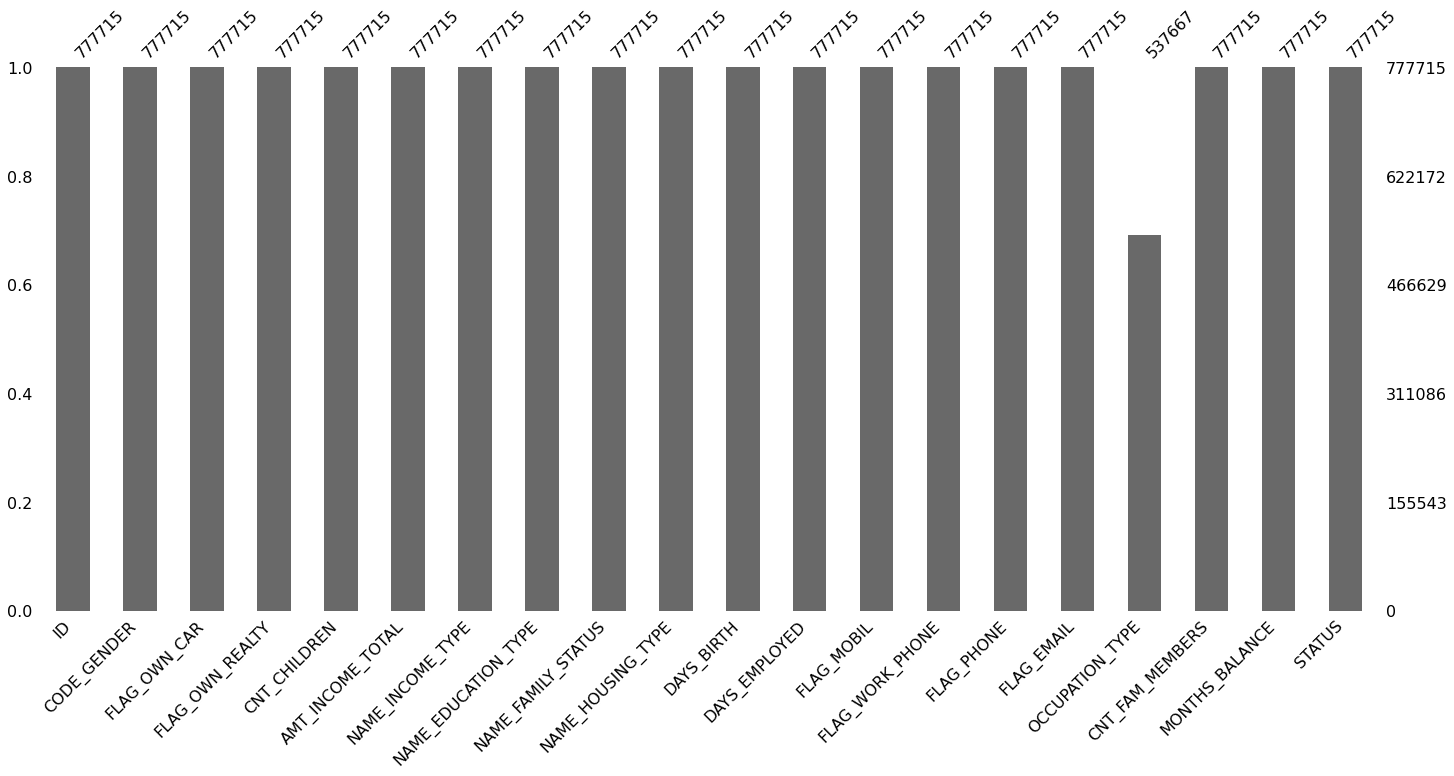

In [16]:
msno.bar(data)


# Data cleaning 

1. check missing value
2. deal with missing value
3. check duplicate value
4. drop unnecessary columns
5. check data type of all columns

In [17]:
#NULL values in data
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
CODE_GENDER                 0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

<AxesSubplot:>

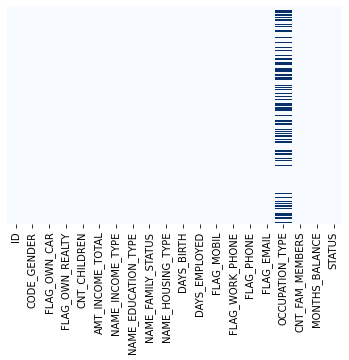

In [18]:
call=data.columns
sns.heatmap(data[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [20]:
data.duplicated().sum()

0

As we can see we have no duplicate value ,so move further.

In [21]:
#FLAG_MOBIL column is not correlated to any feature so let's drop the that column
data.drop('FLAG_MOBIL',inplace=True,axis=1)

In [22]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,-4,C


# Feature Engineering



  We will be performing all the below steps in Feature Engineering

    1. Missing values
    
    2. Temporal variables
    
    3. Categorical variables: remove rare labels
    
    4. Standarise the values of the variables to the same range



In [23]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
DAYS_BIRTH                  0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
DAYS_EMPLOYED               0
NAME_HOUSING_TYPE           0
CODE_GENDER                 0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

In [24]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
data['OCCUPATION_TYPE'].fillna('Other',inplace=True)

In [26]:
data['OCCUPATION_TYPE'].value_counts()

Other                    240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [27]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

Now we don't have NUll data

In [28]:
data.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-3,C


In [29]:
data['CODE_GENDER'].value_counts()

F    518851
M    258864
Name: CODE_GENDER, dtype: int64

In [30]:
male= pd.get_dummies(data['CODE_GENDER'],drop_first=True)

In [31]:
male.value_counts()

M
0    518851
1    258864
dtype: int64

In [32]:
car= pd.get_dummies(data['FLAG_OWN_CAR'],drop_first=True)

In [33]:
car.value_counts()

Y
0    473355
1    304360
dtype: int64

In [34]:
Property= pd.get_dummies(data['FLAG_OWN_REALTY'],drop_first=True)

In [35]:
Property.value_counts()

Y
1    512948
0    264767
dtype: int64

In [36]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64

In [37]:
pd.concat([data,male,car,Property],axis=1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,M,Y,Y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,C,1,1,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-1,C,1,1,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-2,C,1,1,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-3,C,1,1,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-4,C,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-9,0,1,0,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-10,2,1,0,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-11,1,1,0,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,-12,0,1,0,1


In [38]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [39]:
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

In [40]:
data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].apply(education)

In [41]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [42]:
data['NAME_FAMILY_STATUS'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [43]:
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x
    

In [44]:
data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].apply(fun)

In [45]:
data['NAME_FAMILY_STATUS'].value_counts()

Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: NAME_FAMILY_STATUS, dtype: int64

###### let's make some def to handle the date values

In [46]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [47]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(Date_of_Birth)

In [48]:
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(Date_of_Birth)

In [49]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-4,C


In [50]:
#lets drop gender ,flag_own_car,flag_own_realty columns as we have create another columns for them

In [51]:
data.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],inplace=True,axis=1)

In [52]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-1,C
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-2,C
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-3,C
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-11-23,2010-04-30,1,0,0,Other,2.0,-4,C


In [53]:
#let's create a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [54]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(AGE)

In [55]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,2010-04-30,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,2010-04-30,1,0,0,Other,2.0,-1,C
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,2010-04-30,1,0,0,Other,2.0,-2,C
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,2010-04-30,1,0,0,Other,2.0,-3,C
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,2010-04-30,1,0,0,Other,2.0,-4,C


In [56]:
data.rename(columns={'DAYS_BIRTH':'Age'},inplace=True)

In [57]:
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(AGE)

In [58]:
data.head(2)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-1,C


In [59]:
data.rename(columns={'DAYS_EMPLOYED':'Days_worked'})

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,Days_worked,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-1,C
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-2,C
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-3,C
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,Other,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-9,0
777711,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-10,2
777712,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-11,1
777713,5150337,0,112500.0,Working,Secondary,Single,Rented apartment,25,3,0,0,0,Laborers,1.0,-12,0


In [60]:
data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [61]:
data.loc[data['STATUS']=='C','STATUS']=6
data.loc[data['STATUS']=='X','STATUS']=7


In [62]:
data['STATUS']=data['STATUS'].astype(float)

In [63]:
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target
    
        

In [64]:
data.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [65]:
data['Target']=data['STATUS'].apply(solve)

In [66]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-4,6.0,0


In [67]:
data['Target'].value_counts()

0    774887
1      2828
Name: Target, dtype: int64

# Data Visualisation 

In [68]:
data.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
ID,1.000000,0.026269,-0.027597,-0.041679,0.025340,0.084800,0.006346,-0.056083,0.027375,0.005007,0.014255,0.010690
CNT_CHILDREN,0.026269,1.000000,0.039304,-0.355749,0.228958,0.042226,-0.018882,0.015726,0.892079,0.000913,-0.002850,-0.000705
AMT_INCOME_TOTAL,-0.027597,0.039304,1.000000,-0.081554,0.180685,-0.021229,0.018687,0.085776,0.031379,0.001831,-0.013499,0.003267
Age,-0.041679,-0.355749,-0.081554,1.000000,-0.608515,-0.179480,0.027055,-0.100997,-0.327716,-0.035713,-0.004927,0.005317
DAYS_EMPLOYED,0.025340,0.228958,0.180685,-0.608515,1.000000,0.243685,0.013823,0.082473,0.227655,0.004219,-0.002367,-0.003708
FLAG_WORK_PHONE,0.084800,0.042226,-0.021229,-0.179480,0.243685,1.000000,0.312552,-0.037991,0.060183,0.001529,0.010512,0.007412
FLAG_PHONE,0.006346,-0.018882,0.018687,0.027055,0.013823,0.312552,1.000000,0.011901,-0.007824,-0.005120,-0.000747,0.007213
FLAG_EMAIL,-0.056083,0.015726,0.085776,-0.100997,0.082473,-0.037991,0.011901,1.000000,0.012540,0.005288,-0.012077,-0.003054
CNT_FAM_MEMBERS,0.027375,0.892079,0.031379,-0.327716,0.227655,0.060183,-0.007824,0.012540,1.000000,-0.006276,-0.000330,-0.001874
MONTHS_BALANCE,0.005007,0.000913,0.001831,-0.035713,0.004219,0.001529,-0.005120,0.005288,-0.006276,1.000000,0.140139,-0.004405


<AxesSubplot:>

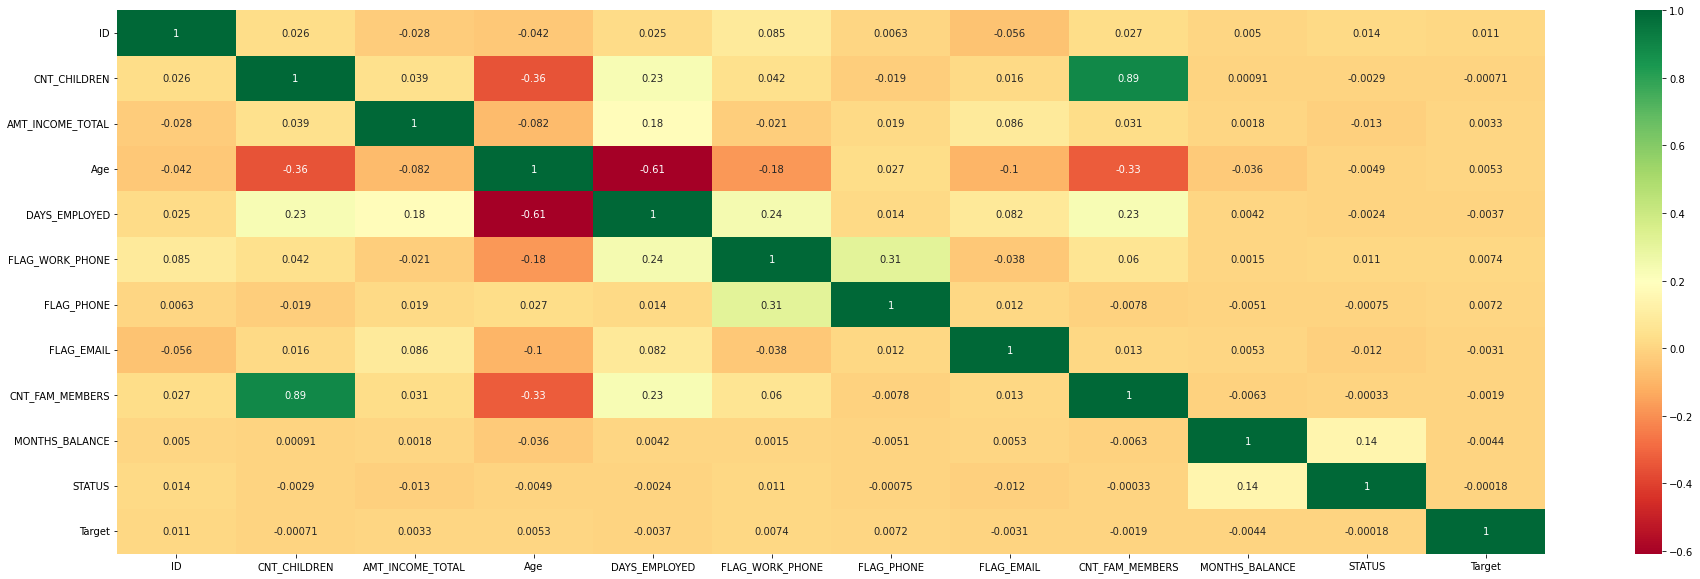

In [69]:
#plt.figure(12,10)
#sns.heatmap(data[data.corr().index].corr(),annot=True,cmap='RdYlGn')
plt.figure(figsize=(32,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [70]:
# for col in data.columns:
#     if data[col].dtypes!='O':
#         sns.countplot(x=data[col])
#         plt.show()

In [71]:
data['NAME_FAMILY_STATUS'].value_counts()

Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: NAME_FAMILY_STATUS, dtype: int64

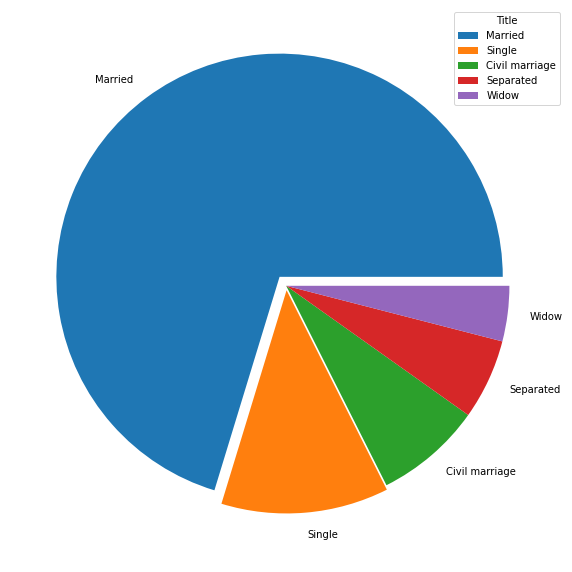

In [72]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_FAMILY_STATUS']=='Married'
m=m.sum()
s=data['NAME_FAMILY_STATUS']=='Single'
s=s.sum()
Cv=data['NAME_FAMILY_STATUS']=='Civil marriage'
Cv=Cv.sum()
sep=data['NAME_FAMILY_STATUS']=='Separated'
sep=sep.sum()
w=data['NAME_FAMILY_STATUS']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

**From the above pie chart ,we conclude that majority of people are married so there expenses more than others.so, we can approve their credit card bcz they can use credit card regularly and in efficient manner for their expenses.**

In [73]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-4,6.0,0


In [74]:
data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: NAME_HOUSING_TYPE, dtype: int64

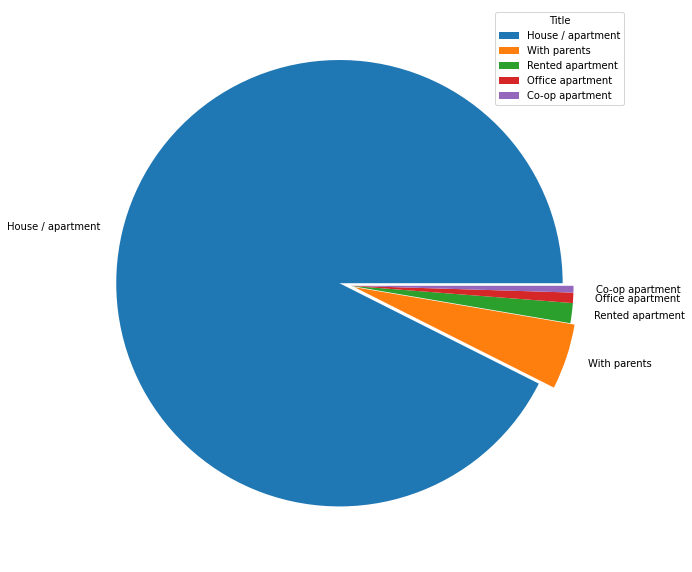

In [75]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_HOUSING_TYPE']=='House / apartment'
m=m.sum()
s=data['NAME_HOUSING_TYPE']=='With parents'
s=s.sum()
Cv=data['NAME_HOUSING_TYPE']=='Rented apartment'
Cv=Cv.sum()
sep=data['NAME_HOUSING_TYPE']=='Office apartment'
sep=sep.sum()
w=data['NAME_HOUSING_TYPE']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

**From this above pie chart , we conclude that most of the people lives in their own house or apartment.So There is a high chance that they are able to pay their bills on time ,so we can approve their credit card**

In [76]:
#  x=data['Age']
#  y=data['DAYS_EMPLOYED']
#  plt.bar(x,y)

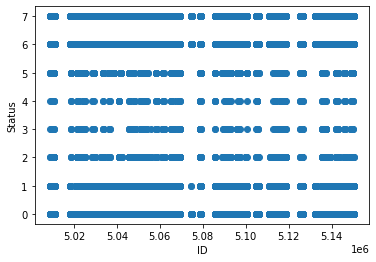

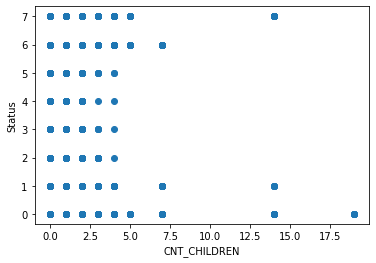

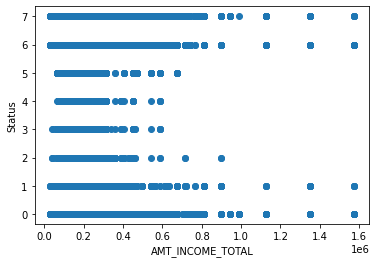

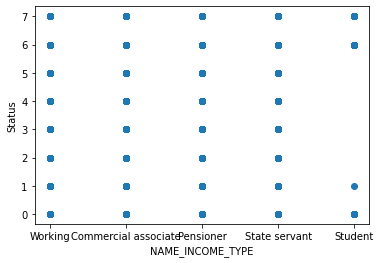

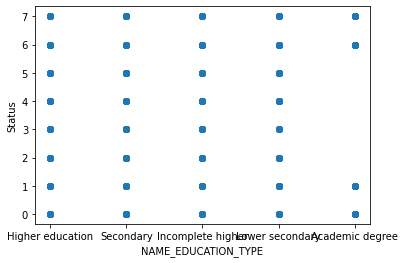

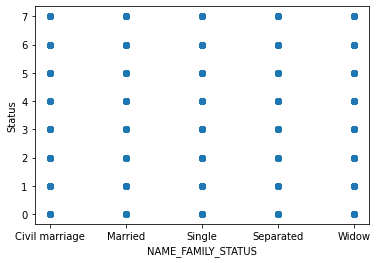

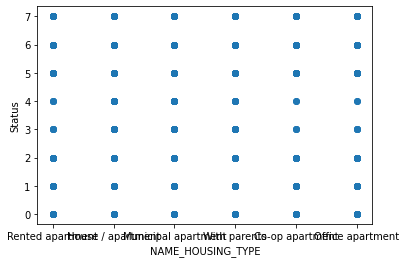

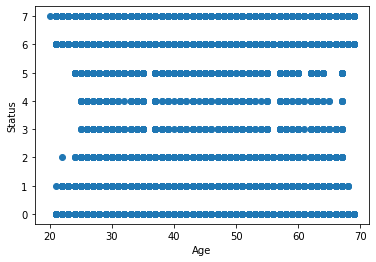

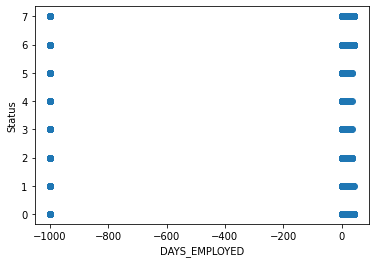

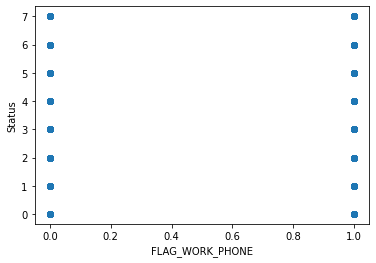

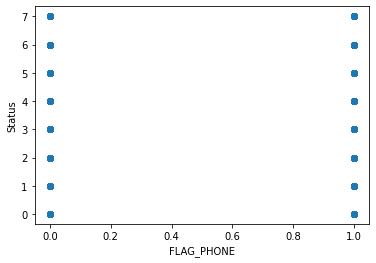

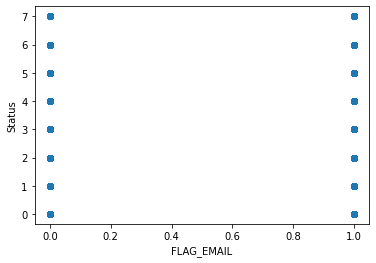

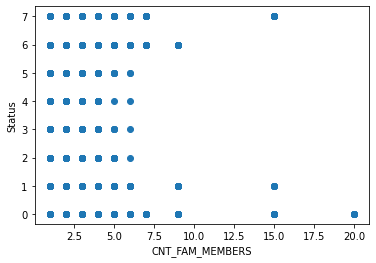

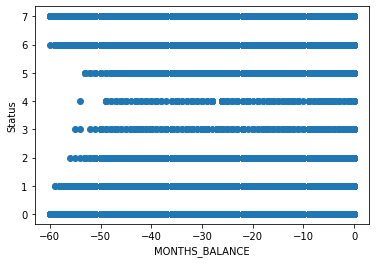

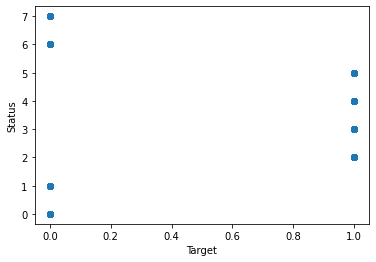

In [77]:
for feature in data.columns:
    if feature!='STATUS':
                dataset=data.copy()
                plt.scatter(dataset[feature],dataset['STATUS'])
                plt.xlabel(feature)
                plt.ylabel('Status')
                plt.show()

# Feature Scaling

In [78]:
# let's make all data in one scale,for that we have to first change the categorical data to numrical data .
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-4,6.0,0


In [79]:
## Let's formed a dictionary
lst = {'Working':1,'Commercial associate':2,'Pensioner':3,'State servant':4,'Student':5}
lst1 = {'Secondary':1,'Higher education':2,'Incomplete higher':3,'Lower secondary':4,'Academic degree':5}
lst2 = {'Married':1,'Single':2,'Civil marriage':3,'Separated':4,'Widow':5}
lst3 = {'House / apartment':1,'With parents':2,'Municipal apartment':3,'Rented apartment':4,'Office apartment':5,'Co-op apartment':6}


In [80]:
#lets replace it into numerical value
data.replace({'NAME_INCOME_TYPE':lst},inplace=True)
data.replace({'NAME_EDUCATION_TYPE':lst1},inplace=True)
data.replace({'NAME_FAMILY_STATUS':lst2},inplace=True)
data.replace({'NAME_HOUSING_TYPE':lst3},inplace=True)

In [81]:
#data.drop('OCCUPATION_TYPE',axis=1,inplace=True)

In [82]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,0,427500.0,1,2,3,4,33,12,1,0,0,2.0,0,6.0,0
1,5008804,0,427500.0,1,2,3,4,33,12,1,0,0,2.0,-1,6.0,0
2,5008804,0,427500.0,1,2,3,4,33,12,1,0,0,2.0,-2,6.0,0
3,5008804,0,427500.0,1,2,3,4,33,12,1,0,0,2.0,-3,6.0,0
4,5008804,0,427500.0,1,2,3,4,33,12,1,0,0,2.0,-4,6.0,0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CNT_CHILDREN         777715 non-null  int64  
 2   AMT_INCOME_TOTAL     777715 non-null  float64
 3   NAME_INCOME_TYPE     777715 non-null  int64  
 4   NAME_EDUCATION_TYPE  777715 non-null  int64  
 5   NAME_FAMILY_STATUS   777715 non-null  int64  
 6   NAME_HOUSING_TYPE    777715 non-null  int64  
 7   Age                  777715 non-null  int64  
 8   DAYS_EMPLOYED        777715 non-null  int64  
 9   FLAG_WORK_PHONE      777715 non-null  int64  
 10  FLAG_PHONE           777715 non-null  int64  
 11  FLAG_EMAIL           777715 non-null  int64  
 12  CNT_FAM_MEMBERS      777715 non-null  float64
 13  MONTHS_BALANCE       777715 non-null  int64  
 14  STATUS               777715 non-null  float64
 15  Target           

**We can see that our all data in float or in int data types.Now we ready to apply FeatureScaling on our data.**

In [84]:
x=data.drop('Target',axis=1)
y=data['Target']

In [85]:
feature_scale = [feature for feature in data.columns if feature!='Target']
## Importing library 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [86]:
scaler.transform(x)

array([[0.        , 0.        , 0.25872093, ..., 0.05263158, 1.        ,
        0.85714286],
       [0.        , 0.        , 0.25872093, ..., 0.05263158, 0.98333333,
        0.85714286],
       [0.        , 0.        , 0.25872093, ..., 0.05263158, 0.96666667,
        0.85714286],
       ...,
       [0.9989413 , 0.        , 0.05523256, ..., 0.        , 0.81666667,
        0.14285714],
       [0.9989413 , 0.        , 0.05523256, ..., 0.        , 0.8       ,
        0.        ],
       [0.9989413 , 0.        , 0.05523256, ..., 0.        , 0.78333333,
        0.        ]])

In [87]:
data = pd.concat([data['Target'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

In [88]:
data.head()

,Target,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.265306,0.970278,1.0,0.0,0.0,0.052632,1.000000,0.857143
1,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.265306,0.970278,1.0,0.0,0.0,0.052632,0.983333,0.857143
2,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.265306,0.970278,1.0,0.0,0.0,0.052632,0.966667,0.857143
3,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.265306,0.970278,1.0,0.0,0.0,0.052632,0.950000,0.857143
4,0,0.0,0.0,0.258721,0.0,0.25,0.5,0.6,0.265306,0.970278,1.0,0.0,0.0,0.052632,0.933333,0.857143


In [89]:
data.Target.value_counts()

0    774887
1      2828
Name: Target, dtype: int64

from the above output,we conclude that data is imbalanced.so, we have to do either under sampling or over sampling.we are going to do over sampling bcz in under sampling .we will lost our almost data.

# Dealing with Unbalanced Dataset

In [90]:
from imblearn.combine import SMOTETomek

In [91]:
smk=SMOTETomek(random_state=12)

In [92]:
data.shape

(777715, 16)

In [93]:
x_res,y_res=smk.fit_resample(x,y)

In [94]:
x_res.shape

(1549720, 15)

In [95]:
y_res.shape


(1549720,)

In [96]:
from collections import Counter

In [97]:
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 774887, 1: 2828})
Resampled dataset shape Counter({0: 774860, 1: 774860})


# Model Deployment

**Now we are going to deploy the model of different algorith to get the maximum accuracy**

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)

In [100]:
x_train.shape,y_train.shape

((1239776, 15), (1239776,))

In [101]:
## import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [102]:
model_list=[LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier]

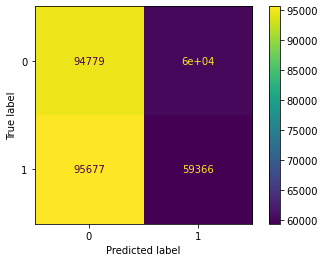

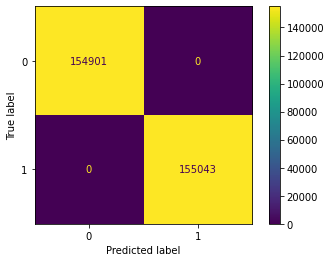

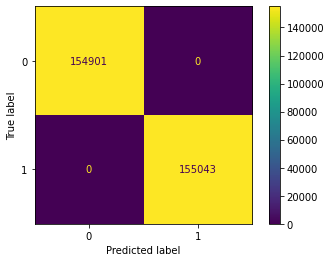

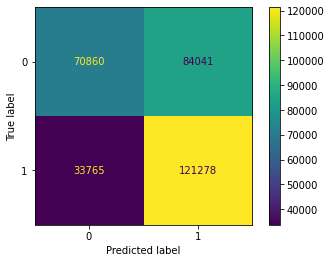

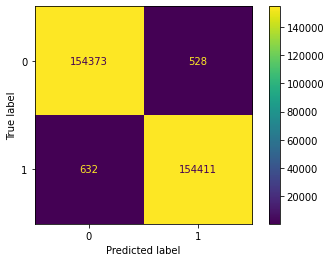

In [103]:
accuracy =[]
for model in model_list :
    model = model()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))

In [104]:
accuracy

[0.4973317760627726, 1.0, 1.0, 0.6199119841003536, 0.9962573884314586]

**From accuracy score we conclude that we should apply Decision Treeclassifier, Random Forestclassifier and KNeighborsClassifier  algorith for be**